In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import KFold,StratifiedKFold
import random
%matplotlib inline
tf.__version__

'2.3.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd 'drive/My Drive/Swedish Leaf'

/content/drive/My Drive/Swedish Leaf


In [4]:
import glob
Leaf1 = glob.glob('./Leaf1/*.*')
Leaf2 = glob.glob('./Leaf2/*.*')
Leaf3 = glob.glob('./Leaf3/*.*')
Leaf4 = glob.glob('./Leaf4/*.*')
Leaf5 = glob.glob('./Leaf5/*.*')
Leaf6 = glob.glob('./Leaf6/*.*')
Leaf7 = glob.glob('./Leaf7/*.*')
Leaf8 = glob.glob('./Leaf8/*.*')
Leaf9 = glob.glob('./Leaf9/*.*')
Leaf10 = glob.glob('./Leaf10/*.*')
Leaf11= glob.glob('./Leaf11/*.*')
Leaf12= glob.glob('./Leaf12/*.*')
Leaf13= glob.glob('./Leaf13/*.*')
Leaf14= glob.glob('./Leaf14/*.*')
Leaf15= glob.glob('./Leaf15/*.*')

data = []
labels = []

In [5]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [6]:
for i in Leaf1:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(0)

In [7]:
for i in Leaf2:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(1)

In [8]:
for i in Leaf3:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(2)

In [9]:
for i in Leaf4:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(3)

In [10]:
for i in Leaf5:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(4)

In [11]:
for i in Leaf6:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(5)

In [12]:
for i in Leaf7:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(6)

In [13]:
for i in Leaf8:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(7)

In [14]:
for i in Leaf9:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(8)

In [15]:
for i in Leaf10:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(9)

In [16]:
for i in Leaf11:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(10)

In [17]:
for i in Leaf12:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(11)

In [18]:
for i in Leaf13:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(12)

In [19]:
for i in Leaf14:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(13)

In [20]:
for i in Leaf15:   
    image=load_img(i)
    img_arr=img_to_array(image)
    data.append(img_arr)
    labels.append(14)

In [21]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=random.randint(0,100))

In [22]:
idg=ImageDataGenerator(rescale=1./255)

In [23]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [24]:
from keras.utils.np_utils import to_categorical   

categorical_labels = to_categorical(labels, num_classes=15)

In [25]:
data1 = np.array(data)
print(data1.shape)

(6000, 128, 128, 3)


In [26]:
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(5,5),strides=(1,1),padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='same'))
  
model.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu',padding='same',strides=(1,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(96,(3,3),activation='relu',strides=(2,2),padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(15,activation='softmax'))
  
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])




 

K-Fold Cross Validation


For K=10 Folds


In [28]:
validation_accuracy_k10=[]
validation_loss_k10=[]
fold_var=1

In [32]:
from sklearn.model_selection import train_test_split
X_train1, X_test0, ytrain1, ytest0 = train_test_split(data1, categorical_labels, test_size=0.1,
                                                    random_state=random.randint(0,100))

In [36]:
for index in range(10):#readings change for every epoch
    
    X_train, X_test1, ytrain, ytest1 = train_test_split(X_train1, ytrain1, test_size=0.2,
                                                    random_state=random.randint(0,100))
    
    X_val, X_test, yval, ytest = train_test_split(X_test1, ytest1, test_size=0.5,
                                                    random_state=random.randint(0,100))
    
    
    
    
   
  
    
    training_set = train_datagen.flow(
            X_train, ytrain,
            batch_size=64)
    
    val_set = val_datagen.flow(
            X_val, yval, 
            batch_size=64)
    
    test_set = test_datagen.flow(
            X_test, ytest,
            batch_size=64)
    
    X, y = test_set.next()
    history=model.fit_generator(
            training_set,
            steps_per_epoch=20,
            epochs=10,
            validation_data=val_set,
            validation_steps=100
            )
     

    
    
    results = model.evaluate(X,y)
    results1=dict(zip(model.metrics_names,results))
    validation_accuracy_k10.append(results1['accuracy'])
    validation_loss_k10.append(results1['loss'])

    tf.keras.backend.clear_session()
    fold_var+=1
    
    

Epoch 1/10
20/20 [==============================] - 59s 3s/step - loss: 2.4416 - accuracy: 0.1953 - val_loss: 2.6226 - val_accuracy: 0.1056
Epoch 2/10
20/20 [==============================] - 53s 3s/step - loss: 2.2362 - accuracy: 0.2398
Epoch 3/10
20/20 [==============================] - 53s 3s/step - loss: 2.0988 - accuracy: 0.2883
Epoch 4/10
20/20 [==============================] - 53s 3s/step - loss: 1.8336 - accuracy: 0.3742
Epoch 5/10
20/20 [==============================] - 52s 3s/step - loss: 1.7363 - accuracy: 0.4119
Epoch 6/10
20/20 [==============================] - 54s 3s/step - loss: 1.6462 - accuracy: 0.4484
Epoch 7/10
20/20 [==============================] - 53s 3s/step - loss: 1.6473 - accuracy: 0.4352
Epoch 8/10
20/20 [==============================] - 54s 3s/step - loss: 1.5020 - accuracy: 0.4820
Epoch 9/10
20/20 [==============================] - 52s 3s/step - loss: 1.4590 - accuracy: 0.4896
Epoch 10/10
2/2 [==============================] - 0s 183ms/step - loss: 2.7

Plotting Training Accuracy and Loss 

In [37]:
acc = history.history['accuracy']

loss = history.history['loss']

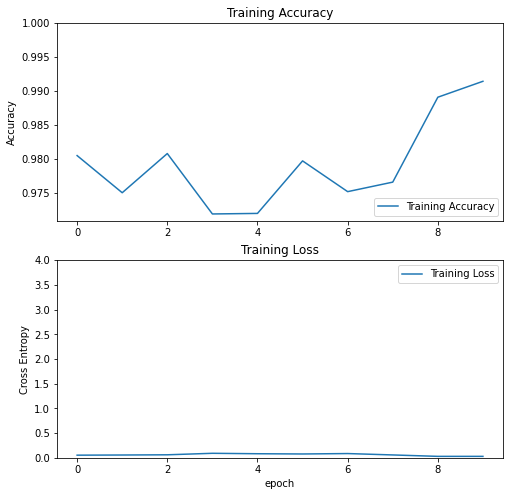

In [38]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,4.0])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

Determining the Mean Accuracy and Loss on the Validation Set

In [39]:
validation_accuracy_k10

[0.15625,
 0.3125,
 0.828125,
 0.84375,
 0.75,
 0.890625,
 0.9375,
 0.953125,
 0.8125,
 0.90625]

In [40]:
validation_loss_k10

[2.7942121028900146,
 2.212526321411133,
 0.6239731311798096,
 0.563250720500946,
 0.8728958368301392,
 0.3907765746116638,
 0.19561173021793365,
 0.08605296909809113,
 1.2306711673736572,
 0.340165913105011]

In [41]:
from statistics import mean
mean_accuracy=mean(validation_accuracy_k10)
mean_loss=mean(validation_loss_k10)

In [42]:
print("Mean validation Accuracy value: ",mean_accuracy*100,"%")
print("Mean validation loss value: ",mean_loss)

Mean validation Accuracy value:  73.90625 %
Mean validation loss value:  0.93101364672184
